In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from PIL import Image
import matplotlib.pyplot as plt

In [13]:
# Đọc dữ liệu
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')

In [14]:
# Kiểm tra dữ liệu
print(data.head())
print(data.shape)

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 785 columns]
(372450, 785)


In [15]:
# Chuẩn bị dữ liệu
X = data.drop('0', axis=1).values
y = data['0'].values
X = X.reshape(-1, 28, 28, 1)
y = to_categorical(y, num_classes=26)

In [16]:
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Xây dựng mô hình LSTM
model = Sequential([
    Input(shape=(28, 28)),
    LSTM(128, return_sequences=True),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')
])

In [18]:

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 200s 42ms/step - accuracy: 0.9110 - loss: 0.3102 - val_accuracy: 0.9635 - val_loss: 0.1252
Epoch 2/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 157s 34ms/step - accuracy: 0.9692 - loss: 0.1034 - val_accuracy: 0.9698 - val_loss: 0.1058
Epoch 3/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 169s 36ms/step - accuracy: 0.9752 - loss: 0.0810 - val_accuracy: 0.9729 - val_loss: 0.0952
Epoch 4/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 178s 38ms/step - accuracy: 0.9787 - loss: 0.0686 - val_accuracy: 0.9770 - val_loss: 0.0797
Epoch 5/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 176s 38ms/step - accuracy: 0.9825 - loss: 0.0555 - val_accuracy: 0.9794 - val_loss: 0.0729
Epoch 6/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 169s 36ms/step - accuracy: 0.9838 - loss: 0.0499 - val_accuracy: 0.9795 - val_loss: 0.0735
Epoch 7/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 170s 37ms/step - accuracy: 0.9849 - loss: 0.0471 - val_accuracy: 0.9809 - val_loss: 0.0727
Epoch 8/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 177s 38ms/step - accuracy: 

In [19]:
# Lưu mô hình
model.save('/mnt/data/handwritten_character_recognition_lstm.h5')

In [20]:
# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss trên tập kiểm tra: {loss}")
print(f"Độ chính xác trên tập kiểm tra: {accuracy}")

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9845 - loss: 0.0633
Loss trên tập kiểm tra: 0.06406921148300171
Độ chính xác trên tập kiểm tra: 0.9840918183326721


In [21]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step


In [22]:
# Báo cáo đánh giá
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=[chr(i + ord('A')) for i in range(26)]))


Classification Report:

              precision    recall  f1-score   support

           A       0.98      0.99      0.98      2806
           B       0.98      0.97      0.98      1673
           C       0.98      0.99      0.99      4742
           D       0.97      0.93      0.95      2044
           E       0.98      0.97      0.98      2214
           F       1.00      0.91      0.95       231
           G       0.96      0.97      0.96      1183
           H       0.96      0.96      0.96      1466
           I       0.94      0.98      0.96       237
           J       0.97      0.98      0.97      1668
           K       0.98      0.96      0.97      1132
           L       0.99      0.98      0.98      2319
           M       0.98      0.98      0.98      2487
           N       0.98      0.98      0.98      3756
           O       0.99      0.99      0.99     11629
           P       0.99      0.99      0.99      3868
           Q       0.97      0.98      0.97      1159
  

In [23]:
# Ma trận nhầm lẫn
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_true, y_pred_classes))


Confusion Matrix:

[[ 2776     1     0     0     0     0     0    10     0     0     1     1
      4     1     1     2     3     4     0     0     1     0     1     0
      0     0]
 [    5  1623     1     4     1     0    12     0     0     2     0     0
      0     0    12     1     0     3     7     0     0     0     1     0
      0     1]
 [    0     1  4718     0     3     0     2     0     0     0     0     5
      0     0     5     0     0     3     0     0     3     0     0     0
      0     2]
 [    1    10     0  1896     0     0     0     0     0     4     0     0
      0     1   114    13     1     0     0     1     2     0     1     0
      0     0]
 [    0     1    16     1  2153     0    11     0     1     0     0     5
      0     0     2     2     0     1    15     1     0     0     0     0
      0     5]
 [    0     0     0     0     5   211     1     0     0     0     0     0
      0     0     0    11     0     0     2     1     0     0     0     0
      0     0]
 [

In [24]:
from tensorflow.keras.saving import save_model
save_model(model, 'Lstm_model.keras')

from tensorflow.keras.models import load_model
#Đường dẫn đến file mô hình đã lưu
model_path = 'Lstm_model.keras'
#Load mô hình từ file đã lưu
loaded_model = load_model(model_path)
#In thông tin cấu trúc của mô hình
loaded_model.summary()

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 28, 128)             │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3584)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         458,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,085,238 (4.14 MB)

 Trainable params: 542,618 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 542,620 (2.07 MB)

In [113]:
#Hàm tiền xử lý ảnh đầu vào
def resize_image(image_path, target_size=(28, 28)):
    image = Image.open(image_path).convert('L')
    ratio = min(target_size[0] / image.width, target_size[1] / image.height)
    new_size = (int(image.width * ratio), int(image.height * ratio))
    resized_image = image.resize(new_size, Image.LANCZOS)
    new_image = Image.new('L', target_size, (255))
    new_image.paste(resized_image, ((target_size[0] - new_size[0]) // 2, (target_size[1] - new_size[1]) // 2))
    return new_image

def preprocess_image(image_path):
    image = resize_image(image_path)
    image_array = np.array(image)
    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    image_array = image_array.reshape(1, 28, 28, 1)
    return image_array

# Hàm dự đoán ký tự từ ảnh
def predict_character(model, image_path):
    processed_image = preprocess_image(image_path)
    predictions = model.predict(processed_image)
    predicted_label = np.argmax(predictions, axis=1)
    predicted_character = chr(predicted_label[0] + ord('A'))
    return predicted_character
    
# Đường dẫn đến ảnh
image_path = r'C:\Users\ADMIN\Downloads\Nhóm 15_AI\N.png'  # Ensure path is correctly formatted
predicted_character = predict_character(model, image_path)
print(f'Predicted character: {predicted_character}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted character: N


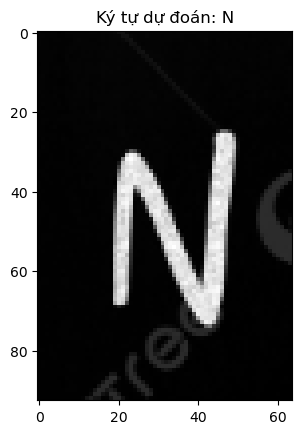

In [114]:
# Hiển thị ảnh và ký tự dự đoán
image = Image.open(image_path).convert('L')
plt.imshow(image, cmap='gray')
plt.title(f'Ký tự dự đoán: {predicted_character}')
plt.show()